In [1]:
# Dependencies
import numpy as np
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Term
target_term = "@plotbot22"

# track accounts that have already been analyzed
past_accounts = []


def plotbot():
    target_account = []

    # Search for all tweets
    public_tweets = api.search(target_term, count=5, result_type="recent")
    
    # create a blank list of users
    users = []
    
    # Loop through all tweets
    for tweet in public_tweets["statuses"]:
        
        past = False
        # Get ID and Author of most recent tweet directed to me
        tweet_id = tweet["id"]
        tweet_author = tweet["user"]["screen_name"]
        tweet_text = tweet["text"]
        
        tweet_text = tweet_text.replace(" ", "")
        tweet_text = tweet_text.split(':')[1]
        
        for acc in past_accounts:
            if tweet_text == acc:
                past = True
        if past:
            next
        else:
            past_accounts.append(tweet_text)
            target_account.append(tweet_text)
            users.append("@%s" % tweet_author)
        
    
    
    
    counter = 0
    for target in target_account:
        count = 0
        sentiments = []
        # gather 500 tweets
        for x in range(25):
            
            # Get all tweets from home feed
            public_tweets_targ = api.user_timeline(target, page = x)
            
            # Loop through all tweets 
            for tweet in public_tweets_targ:

                # Run Vader Analysis on each tweet
                compound = analyzer.polarity_scores(tweet["text"])["compound"]
                pos = analyzer.polarity_scores(tweet["text"])["pos"]
                neu = analyzer.polarity_scores(tweet["text"])["neu"]
                neg = analyzer.polarity_scores(tweet["text"])["neg"]
                tweets_ago = counter

                # Add sentiments for each tweet into an array
                sentiments.append({"Date": tweet["created_at"], 
                                   "Compound": compound,
                                   "Positive": pos,
                                   "Negative": neu,
                                   "Neutral": neg,
                                   "Tweets Ago": tweets_ago})

                # Add to counter 
                counter = counter - 1
        
        # Convert sentiments to DataFrame
        sentiments_pd = pd.DataFrame.from_dict(sentiments)

        # Create plot
        plt.plot(sentiments_pd["Tweets Ago"],
                 sentiments_pd["Compound"], marker="o", linewidth=0.5,
                 alpha=0.8, label = target)

        # # Incorporate the other graph properties
        plt.title("Sentiment Analysis of Tweets %s (%s)" % (target, time.strftime("%x")))
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
        plt.ylabel("Tweet Polarity")
        plt.xlabel("Tweets Ago")

        # save figure
        plt.savefig("%s.png" % target)
        plt.show()        
        api.update_with_media("%s.png" % target,
                      "New Tweet Analysis: %s (%s)" % (target, users[count]))

        count += 1
        counter = 0


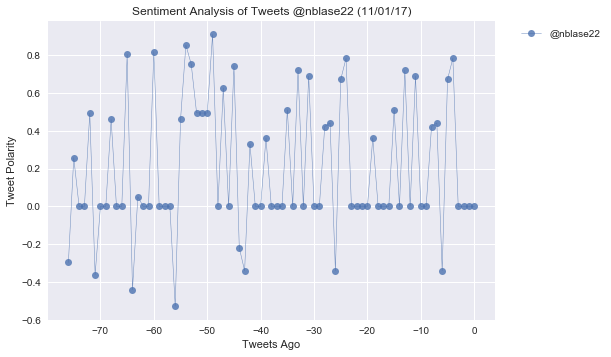

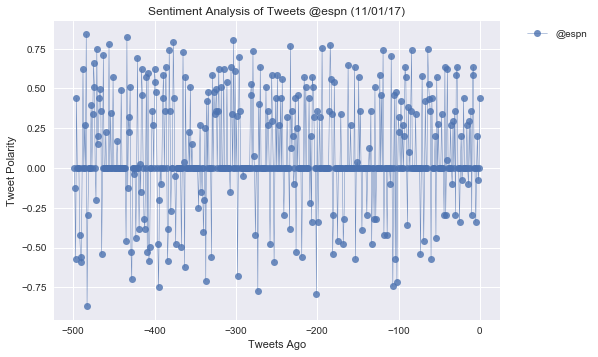

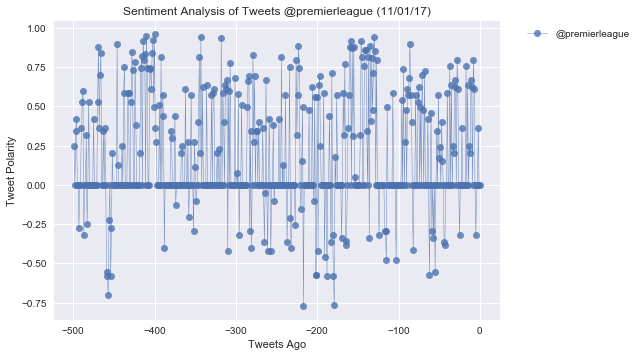

In [ ]:
# Set timer to run every 5 minutes
while(True):
    plotbot()
    time.sleep(300)